In this notebook, I will gather the time-series data of relevant stock prices and volume of my stocks of interest from YahooFinance using the pandas_datareader module.

In [1]:
from pandas_datareader import data as pdd
import sys

In [45]:
# Try the AOT data
try:
    aot = pdd.get_data_yahoo('AOT.BK', start = '2017-01-01', end = '2017-04-30')
    print(aot.tail())
except:
    print('Error:', sys.exc_info()[0])
    print('Description:', sys.exc_info()[1])

             High    Low   Open  Close      Volume  Adj Close
Date                                                         
2017-04-24  41.50  40.75  41.00  41.00  35314600.0  39.216961
2017-04-25  41.50  40.75  41.00  41.25  39140700.0  39.456089
2017-04-26  41.75  41.00  41.50  41.50  39840000.0  39.695221
2017-04-27  41.50  40.75  41.50  40.75  23371400.0  38.977833
2017-04-28  41.00  40.25  40.75  40.25  24434600.0  38.499577


In [3]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd

In [42]:
def candlestickplot(data, start, end):
    data = data[(data.index >= start) & (data.index <= end)]
    
    #mondays = WeekdayLocator(MONDAY)
    locator = mdates.MinuteLocator(byminute=[0,30])
    locator.MAXTICKS = 1500
    
    alldays = DayLocator()
    weekFormatter = DateFormatter('%b-%d')
    dayFormatter = DateFormatter('%d')
    
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(12)
    fig.subplots_adjust(bottom = 0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    
    #candlestick_ohlc(ax, data['Open'], data['High'], data['Low'], data['Close'])

    candlestick_ohlc(ax, zip(mdates.date2num(data.index.to_pydatetime()),
                         data['Open'], data['High'],
                         data['Low'], data['Close']),
                     width=0.6, colorup='g')
    
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation = 45,
             horizontalalignment = 'right')

    plt.title('Candlestick Plot')
    plt.show()

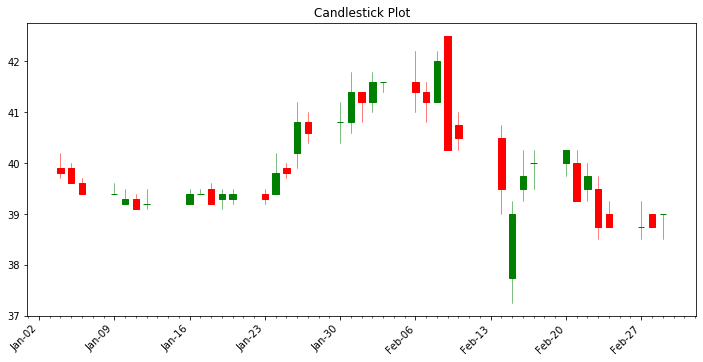

In [44]:
start = '2017-01-01'
end = '2017-03-01'
candlestickplot(aot, start, end)